# **Series de Tiempo**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot, lag_plot
from patsy import dmatrices
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
raw_data = pd.read_csv('dow_jones_index.data', index_col=[0])

In [ ]:
raw_data.head()

,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
quarter,,,,,,,,,,,,,,,
1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [ ]:
clean_df = raw_data[['date', 'high', 'low', 'volume', 'percent_change_price']].copy()

In [ ]:
formatted_date = pd.to_datetime(clean_df['date'])
clean_df['date'] = formatted_date

In [ ]:
clean_df.head()

,date,high,low,volume,percent_change_price
quarter,,,,,
1,2011-01-07,$16.72,$15.78,239655616,3.79267
1,2011-01-14,$16.71,$15.64,242963398,-4.42849
1,2011-01-21,$16.38,$15.60,138428495,-2.47066
1,2011-01-28,$16.63,$15.82,151379173,1.63831
1,2011-02-04,$17.39,$16.18,154387761,5.93325


In [ ]:
clean_df = clean_df.set_index(['date'])

In [ ]:
clean_df.head()

,high,low,volume,percent_change_price
date,,,,
2011-01-07,$16.72,$15.78,239655616,3.79267
2011-01-14,$16.71,$15.64,242963398,-4.42849
2011-01-21,$16.38,$15.60,138428495,-2.47066
2011-01-28,$16.63,$15.82,151379173,1.63831
2011-02-04,$17.39,$16.18,154387761,5.93325


In [ ]:
high_list = []
for i in clean_df['high']:
    high_list.append(i[1:])

In [ ]:
low_list = []
for i in clean_df['low']:
    low_list.append(i[1:])

In [ ]:
df = clean_df.copy()

In [ ]:
df['high'] = high_list

In [ ]:
df['low'] = low_list

In [ ]:
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])

In [ ]:
df.sort_index(ascending = True)

,high,low,volume,percent_change_price
date,,,,
2011-01-07,16.72,15.78,239655616,3.792670
2011-01-07,30.10,28.66,157834347,-2.796500
2011-01-07,14.69,13.80,1453438639,2.888090
2011-01-07,65.08,64.00,52323352,0.170834
2011-01-07,18.38,17.62,386804789,3.615820
...,...,...,...,...
2011-06-24,15.64,14.92,429730443,-0.066934
2011-06-24,50.15,48.15,34877916,-0.020682
2011-06-24,102.50,96.05,43722864,3.648050


## Media

In [ ]:
daily_mean = df.groupby(df.index).mean()

In [ ]:
print(daily_mean.head())

                 high        low        volume  percent_change_price
date                                                                
2011-01-07  52.394333  50.535000  1.641992e+08              0.533190
2011-01-14  52.315333  50.572000  1.090246e+08              1.322282
2011-01-21  52.934333  51.229333  1.223585e+08              0.156960
2011-01-28  53.713667  51.400333  1.507353e+08             -0.597219
2011-02-04  53.592333  51.746333  1.199585e+08              2.099038


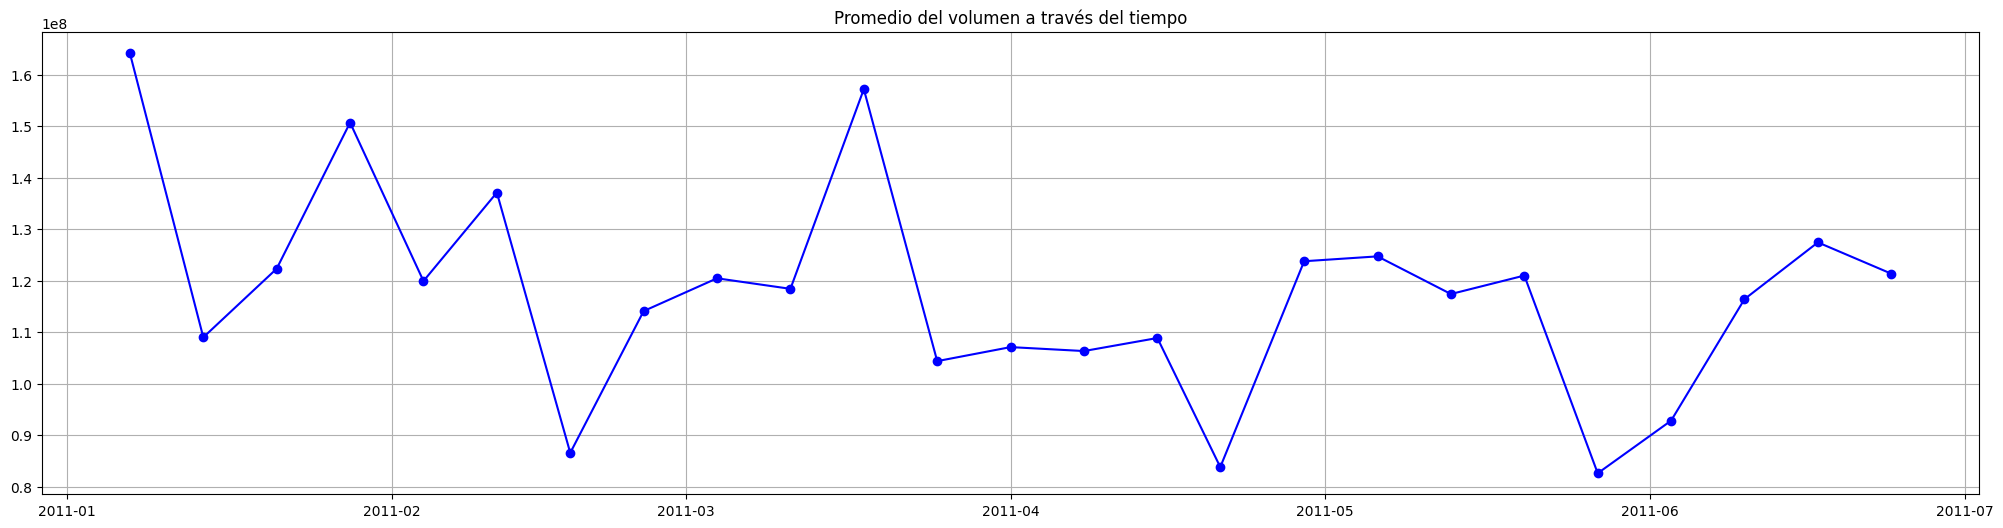

In [ ]:
fig = plt.figure(figsize=(25, 6))

plt.title('Promedio del volumen a través del tiempo')
plt.plot(daily_mean.index, daily_mean['volume'], 'bo-')
plt.grid()
plt.show()

In [ ]:
adf = adfuller (df["volume"], maxlag = 1)
print("T-test (Test Statistic): ", adf[0], "In")
print("P-value: ", adf[1], "\n")
print("Valores criticos (Critical Value): ", adf[4])

T-test (Test Statistic):  -7.5796458194602465 In
P-value:  2.703191222000702e-11 

Valores criticos (Critical Value):  {'1%': -3.43912257105195, '5%': -2.8654117005229844, '10%': -2.568831705010152}


## Máximo

In [ ]:
daily_max = df.groupby(df.index).max()

In [ ]:
print(daily_max.head())

              high     low      volume  percent_change_price
date                                                        
2011-01-07  148.86  146.64  1453438639               6.79773
2011-01-14  150.00  146.00   760935694               7.62174
2011-01-21  156.78  149.38   982445809               4.00421
2011-01-28  164.35  155.33  1054415375               3.81916
2011-02-04  164.20  158.68   757192224               6.10225


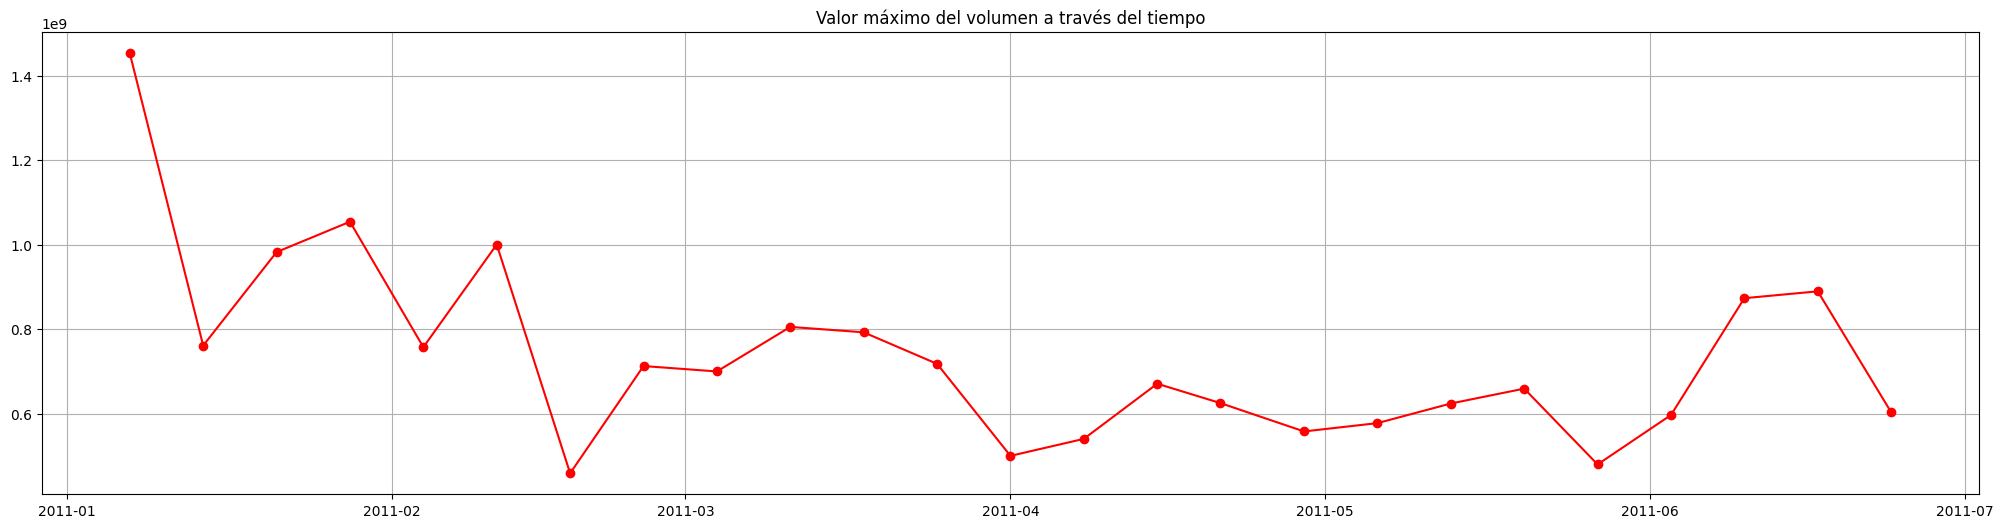

In [ ]:
fig = plt.figure(figsize=(25, 6))

plt.title('Valor máximo del volumen a través del tiempo')
plt.plot(daily_mean.index, daily_max['volume'], 'ro-')
plt.grid()
plt.show()

## Mínimo

In [ ]:
daily_min = df.groupby(df.index).min()

In [ ]:
print(daily_min.head())

             high    low    volume  percent_change_price
date                                                    
2011-01-07  14.69  13.80  15797841              -4.92066
2011-01-14  15.25  14.09  11585909              -8.13204
2011-01-21  15.16  13.94  10705548              -5.50398
2011-01-28  14.26  13.40  23565688              -4.75570
2011-02-04  14.47  13.64  14960948              -1.20156


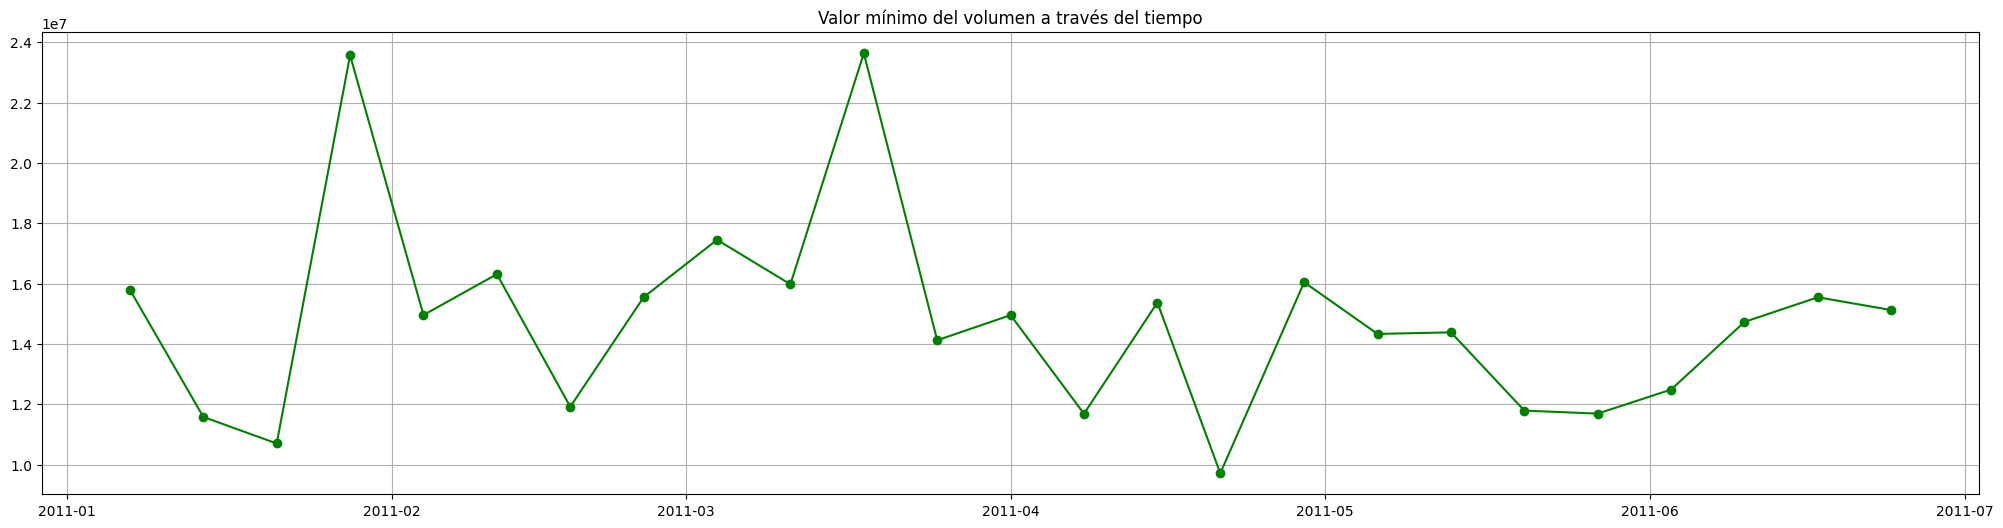

In [ ]:
fig = plt.figure(figsize=(25, 6))

plt.title('Valor mínimo del volumen a través del tiempo')
plt.plot(daily_mean.index, daily_min['volume'], 'go-')
plt.grid()
plt.show()

## Mediana

In [ ]:
daily_median = df.groupby(df.index).median()

In [ ]:
print(daily_median.head())

              high     low      volume  percent_change_price
date                                                        
2011-01-07  45.495  42.875  68495833.0             -0.093403
2011-01-14  46.250  44.290  43414161.5              1.340270
2011-01-21  47.175  45.235  47106921.0              0.439145
2011-01-28  47.050  44.810  69794209.5             -0.972797
2011-02-04  46.760  44.715  59091744.5              2.070980


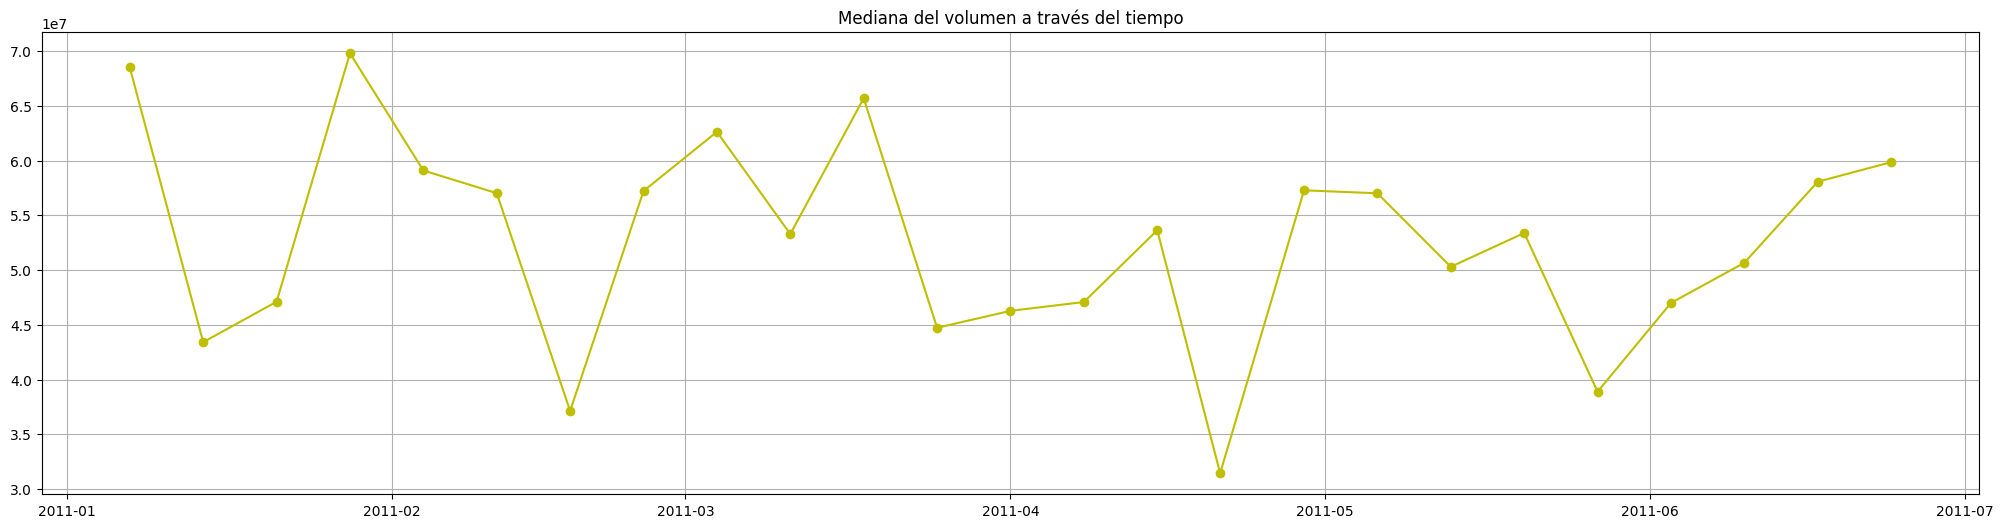

In [ ]:
fig = plt.figure(figsize=(25, 6))

plt.title('Mediana del volumen a través del tiempo')
plt.plot(daily_mean.index, daily_median['volume'], 'yo-')
plt.grid()
plt.show()

## Estacionalidad

In [ ]:
rolling_mean = daily_median.rolling(7).mean()
rolling_std = daily_median.rolling(7).std()

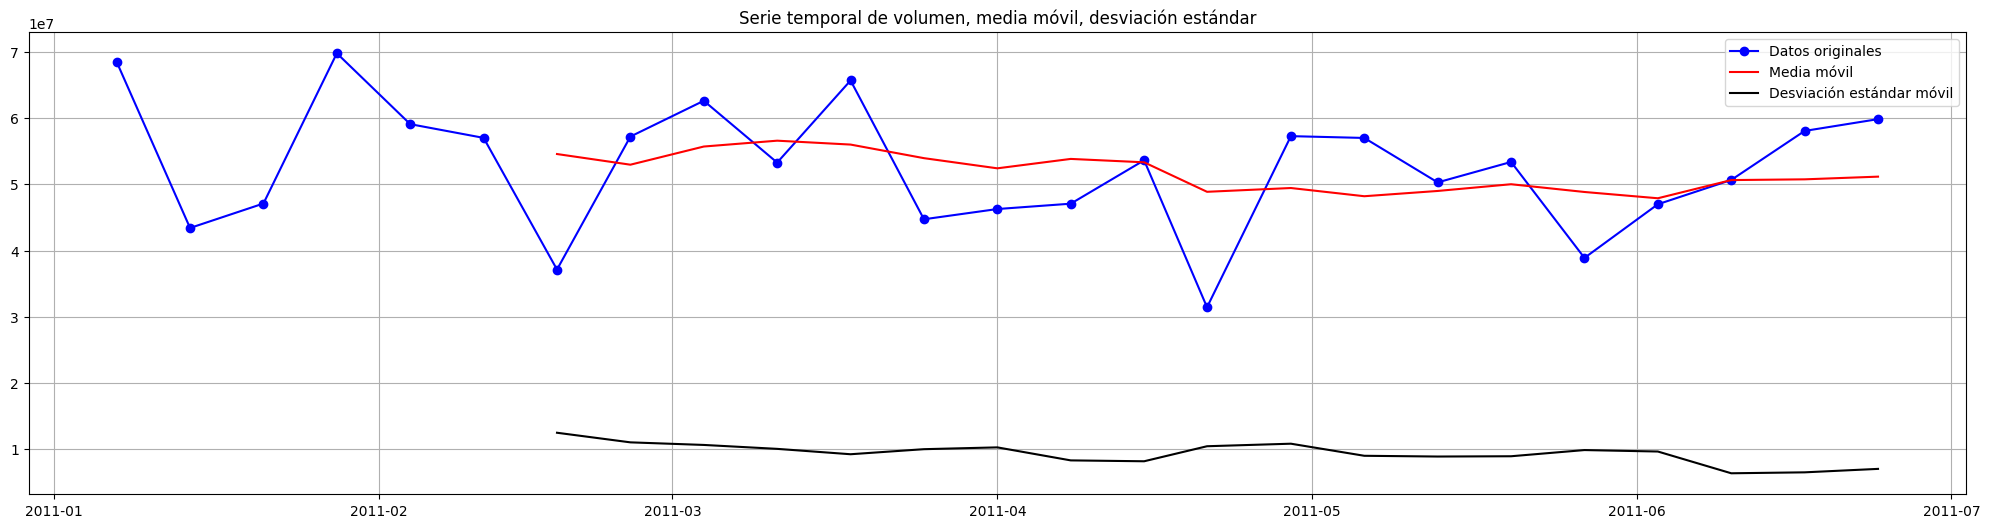

In [ ]:
fig = plt.figure(figsize = (25, 6))

original, = plt.plot(daily_median.index, daily_median['volume'], 'bo-', label = 'Datos originales')
roll_mean, = plt.plot(rolling_mean.index, rolling_mean['volume'], 'r-', label = 'Media móvil')
roll_std, = plt.plot(rolling_std.index, rolling_std['volume'], 'k-', label = 'Desviación estándar móvil')

plt.title("Serie temporal de volumen, media móvil, desviación estándar")
plt.legend(handles = [original, roll_mean, roll_std], loc = "best")
plt.grid()
plt.show()

## Prueba de Dicky-Fuller

In [ ]:
adf = adfuller(df["volume"], maxlag = 1)

print("T-test: ", adf[0], "\n")
print("p-valor: ", adf[1], "\n")
print("Valores criticos: ", adf[4])

T-test:  -7.5796458194602465 

p-valor:  2.703191222000702e-11 

Valores criticos:  {'1%': -3.43912257105195, '5%': -2.8654117005229844, '10%': -2.568831705010152}


> Podemos observar por medio de la prueba de Dicky-Fuller que nuestra serie sí es estacionaria debido a que el resultado de `Test Statistic` es menor a todos los valores críticos que se obtuvieron. Del mismo modo, el `p-value` es menor al umbral de 0.05, lo cual confirma que hay estacionalidad y por lo tanto rechazamos la hipótesis nula.

## Regresión de Poisson

In [ ]:
mean_data = df.groupby(df.index).mean()

In [ ]:
df_train, df_test = train_test_split(mean_data, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
expr = """volume ~ high + low + percent_change_price"""

In [ ]:
y_train, X_train = dmatrices(expr, df_train, return_type = 'dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type = 'dataframe')

In [ ]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 volume   No. Observations:                   20
Model:                            GLM   Df Residuals:                       16
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.0725e+07
Date:                Sat, 18 Nov 2023   Deviance:                   4.1450e+07
Time:                        03:50:08   Pearson chi2:                 4.12e+07
No. Iterations:                    81   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               21.2052 

In [ ]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
predictions_summary_frame = poisson_predictions.summary_frame()

In [ ]:
predicted_counts = predictions_summary_frame['mean']
actual_counts = y_test['volume']

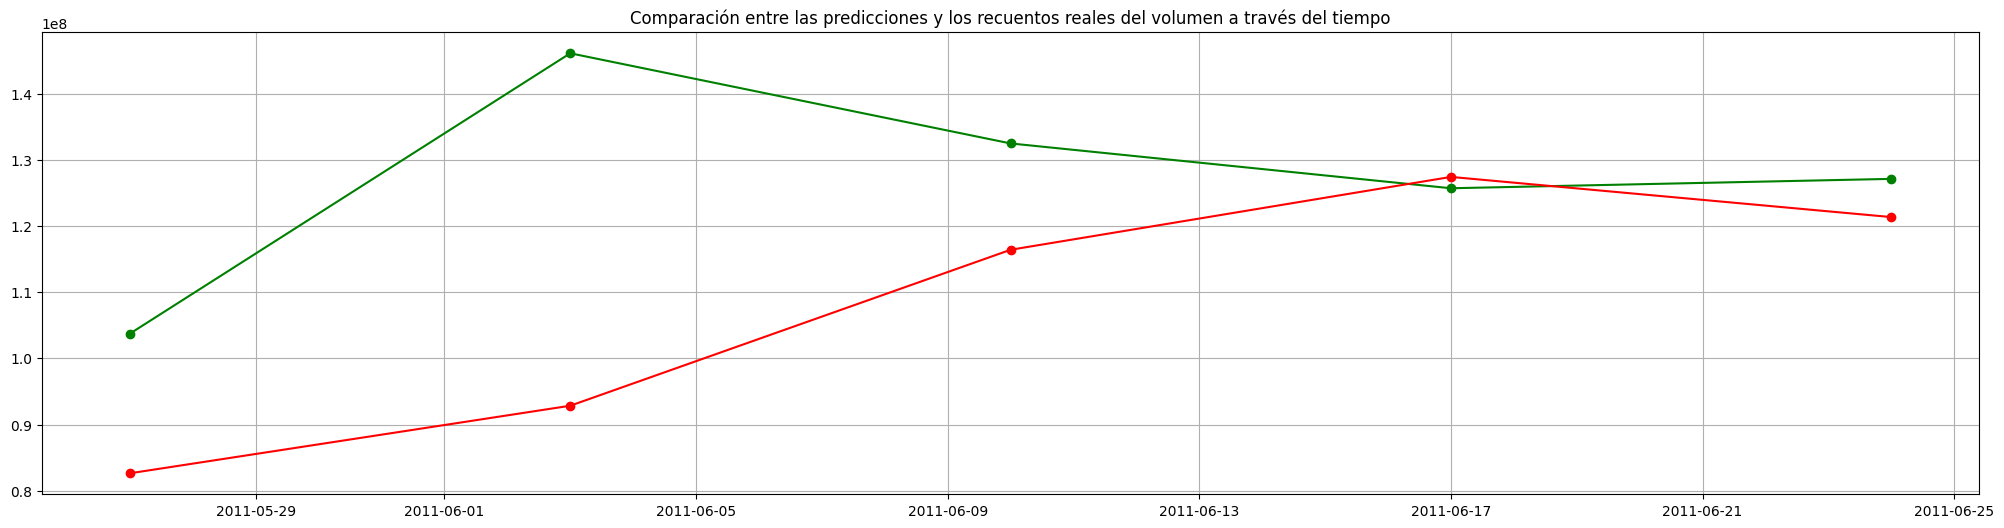

In [ ]:
fig = plt.figure(figsize=(25,6))

predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Recuentos predichos')
actual, = plt.plot(y_test, 'ro-', label='Recuentos reales')
plt.title('Comparación entre las predicciones y los recuentos reales del volumen a través del tiempo')
plt.grid()
plt.show()

**Después de realizar el preprocesamiento de los datos, analisis de estacionariedad y el resumen del modelo ¿Qué información/caracteristicas puede decir de los datos originales?**
> Los coeficientes de las variables independientes indican un aumento en 'high' en el logaritmo del volumen, mientras que 'low' y 'percent_change_price' están asociadas con reducciones. Los p-valores cercanos a cero sugieren la significancia estadística de estas variables en la predicción del volumen. Las estadísticas de ajuste del modelo indican la calidad del ajuste, siendo el R-squared de 1.000, lo cual podría señalar un ajuste sólido. La comparación entre las predicciones y los datos reales muestra eficacia del modelo al capturar la relación entre las variables a lo largo del tiempo.

**¿Qué pasa si se intenta una operación de extrapolación (Forecasting) de los datos con el modelo?**
> Al intentar una operación de extrapolación con el modelo de regresión se utiliza la relación establecida entre las variables independientes y la variable dependiente para estimar valores futuros de volumen. Considerando que el modelo se ha ajustado utilizando los datos previos, su capacidad para realizar predicciones precisas depende de la estabilidad de las relaciones. Además, la precisión de las predicciones puede disminuir a medida que nos alejamos en el tiempo de los datos utilizados para entrenar el modelo. Por lo tanto, al realizar extrapolaciones se debe de considerar posibles cambios en las condiciones que podrían afectar las predicciones.

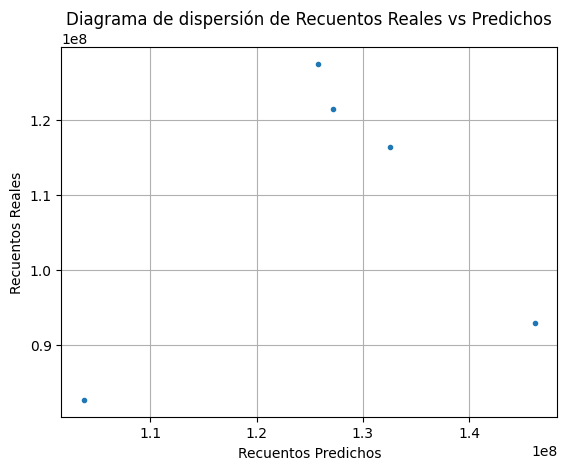

In [ ]:
fig = plt.figure()

plt.scatter(x=predicted_counts, y=actual_counts, marker='.')

plt.title('Diagrama de dispersión de Recuentos Reales vs Predichos')
plt.xlabel('Recuentos Predichos')
plt.ylabel('Recuentos Reales')
plt.grid()
plt.show()

## Autocorrelación

In [ ]:
autocorrelation = mean_data['volume'].autocorr(lag = 1)
print(autocorrelation)

0.01341270719330465


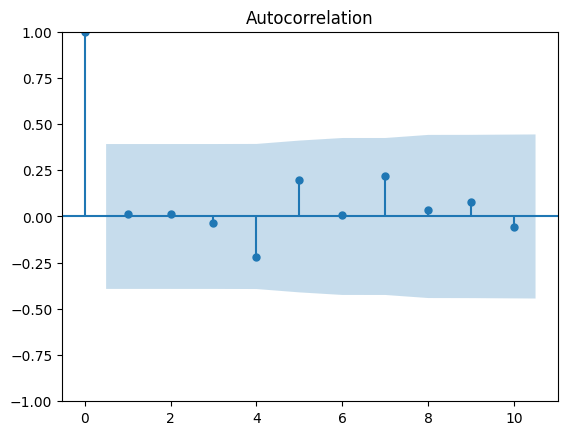

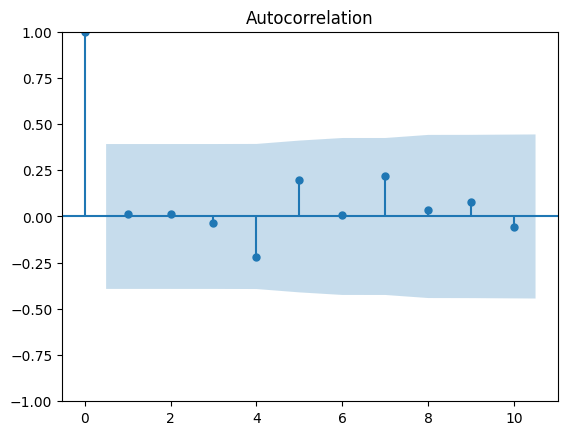

In [ ]:
plot_acf(mean_data['volume'],lags = 10)

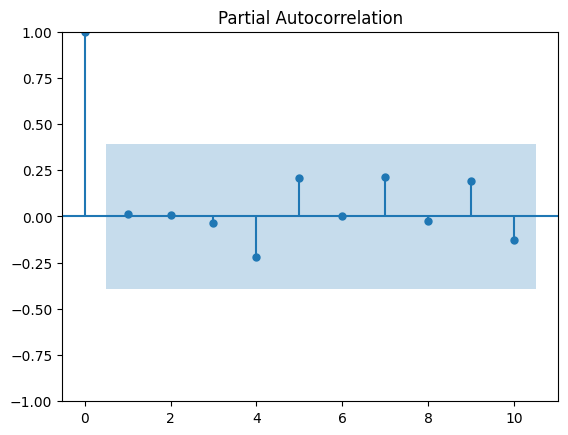

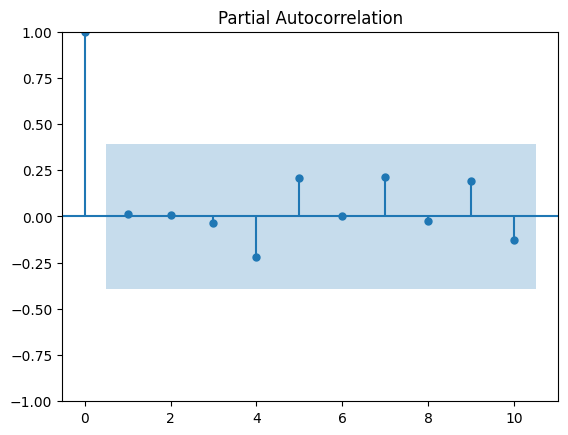

In [ ]:
plot_pacf(mean_data['volume'],lags=10)

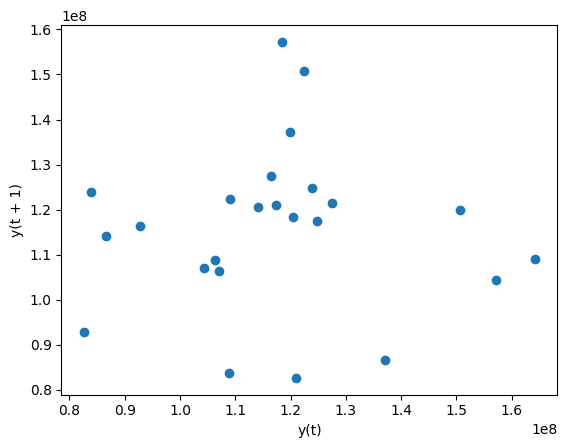

In [ ]:
lag_plot(mean_data['volume'])
pyplot.show()

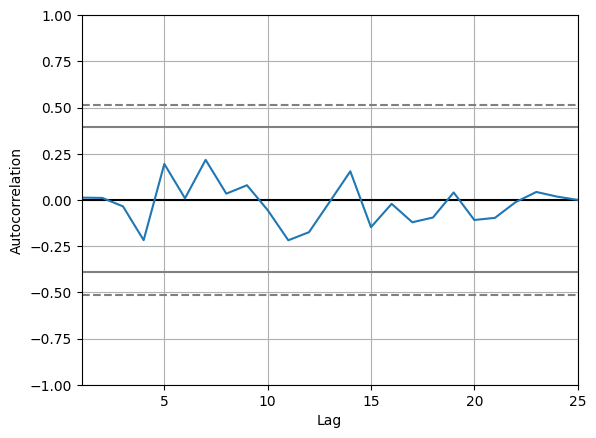

In [ ]:
autocorrelation_plot(mean_data['volume'])
pyplot.show()

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(endog=y_train.reset_index().iloc[:, -1], exog=X_train.reset_index().iloc[:, 1:], lags = 2).fit()
print('Coeficientes: %s' % model.params)

Coeficientes: const                   1.334474e+08
volume.L1               6.608950e-02
volume.L2               9.666591e-02
Intercept               1.334474e+08
high                    1.895315e+07
low                    -2.284698e+07
percent_change_price   -4.295599e+06
dtype: float64


In [ ]:
model.predict(20, 24, exog_oos = X_test.reset_index().iloc[:, 1:])

20    1.010380e+08
21    1.457565e+08
22    1.293032e+08
23    1.261516e+08
24    1.260743e+08
dtype: float64

In [ ]:
predictions = model.predict(20, 24, exog_oos = X_test.reset_index().iloc[:, 1:]).values

for i in range(len(predictions)):
    print(f"Predicho = {predictions[i]:.4f}, Esperado = {df_test.reset_index()['volume'].values[i]:.4f}")

Predicho = 101037964.2531, Esperado = 82620614.9333
Predicho = 145756486.3267, Esperado = 92843928.3000
Predicho = 129303182.0494, Esperado = 116443430.9333
Predicho = 126151592.6938, Esperado = 127469133.9667
Predicho = 126074281.9808, Esperado = 121391559.1333


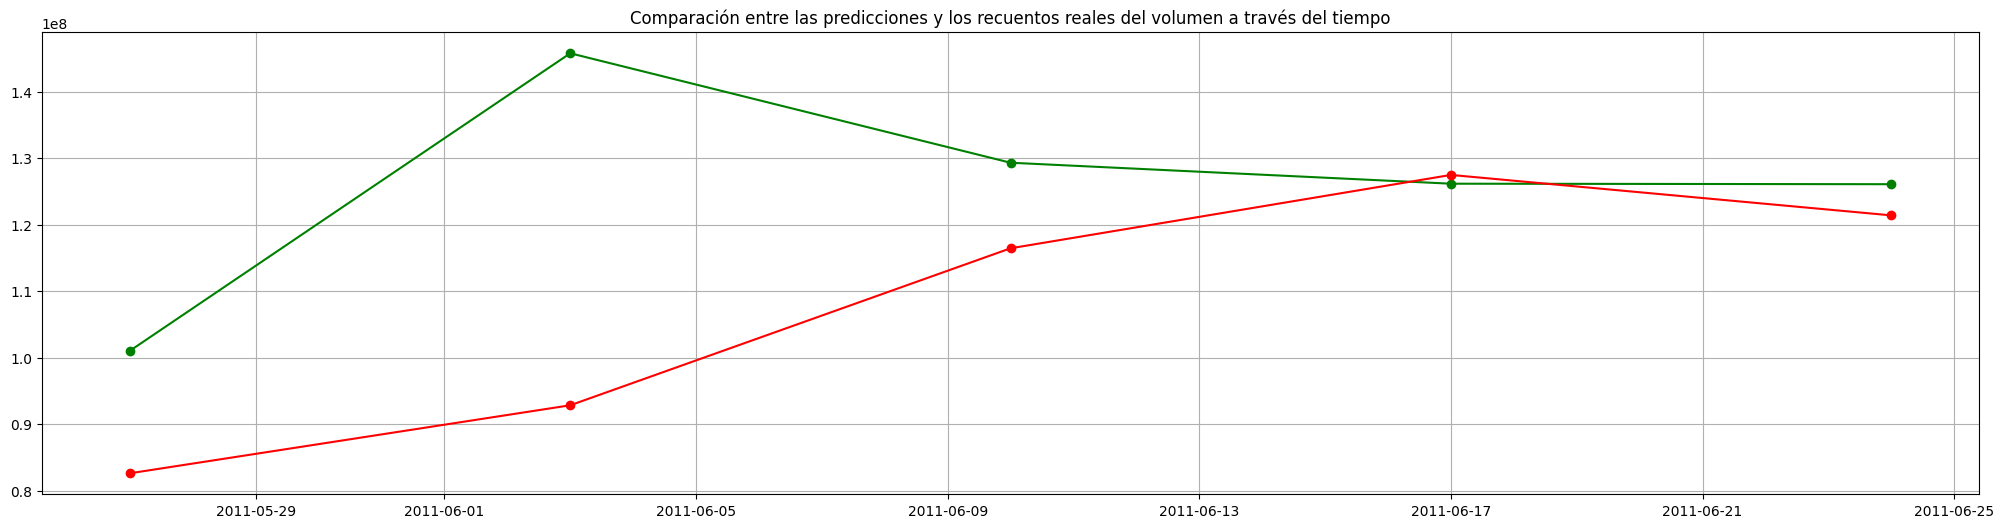

In [ ]:
fig = plt.figure(figsize=(25,6))

predicted, = plt.plot(X_test.index, predictions, 'go-', label='Recuentos predichos')
actual, = plt.plot(df_test.volume, 'ro-', label='Recuentos reales')
plt.title('Comparación entre las predicciones y los recuentos reales del volumen a través del tiempo')
plt.grid()
plt.show()

## Modelos ARIMA

In [ ]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
warnings.filterwarnings("ignore")

ar_x = X_train.drop("Intercept", axis=1)

best_aic = float("inf")
best_order = None

for p in range(1, 20):
    try:
        model = ARIMA(y_train, ar_x, order = (p, 0, 0))
        model_fit = model.fit()
        aic = model_fit.aic
        print(f"AR({p}): AIC = {aic:.2f}")

        if aic < best_aic:
            best_aic = aic
            best_order = (p, 0, 0)

    except Exception as e:
        print(f"Error para AR({p}): {e}")

print (f"\nMejor orden de AR: {best_order} con AIC: {best_aic:.2f}")

AR(1): AIC = 731.93
AR(2): AIC = 733.67
AR(3): AIC = 735.41
AR(4): AIC = 736.05
AR(5): AIC = 736.74
AR(6): AIC = 738.70
AR(7): AIC = 740.20
AR(8): AIC = 741.65
AR(9): AIC = 743.41
AR(10): AIC = 590575626198.24
Error para AR(11): LU decomposition error.
AR(12): AIC = 1009841037813.81
AR(13): AIC = 1775244220564.44
AR(14): AIC = 587841309710.02
AR(15): AIC = 316729855490.86
AR(16): AIC = 39335327318.10
AR(17): AIC = 53388746606.52
AR(18): AIC = 46.00
AR(19): AIC = 760.66

Mejor orden de AR: (18, 0, 0) con AIC: 46.00


In [ ]:
series = mean_data['volume'].copy()
print(series)
series.index = series.index.to_period('M')
print ("\n", series)

date
2011-01-07    1.641992e+08
2011-01-14    1.090246e+08
2011-01-21    1.223585e+08
2011-01-28    1.507353e+08
2011-02-04    1.199585e+08
2011-02-11    1.371438e+08
2011-02-18    8.658673e+07
2011-02-25    1.141245e+08
2011-03-04    1.204931e+08
2011-03-11    1.184469e+08
2011-03-18    1.572290e+08
2011-03-25    1.044030e+08
2011-04-01    1.071276e+08
2011-04-08    1.063614e+08
2011-04-15    1.088940e+08
2011-04-21    8.382196e+07
2011-04-29    1.238058e+08
2011-05-06    1.247516e+08
2011-05-13    1.174370e+08
2011-05-20    1.210239e+08
2011-05-27    8.262061e+07
2011-06-03    9.284393e+07
2011-06-10    1.164434e+08
2011-06-17    1.274691e+08
2011-06-24    1.213916e+08
Name: volume, dtype: float64

 date
2011-01    1.641992e+08
2011-01    1.090246e+08
2011-01    1.223585e+08
2011-01    1.507353e+08
2011-02    1.199585e+08
2011-02    1.371438e+08
2011-02    8.658673e+07
2011-02    1.141245e+08
2011-03    1.204931e+08
2011-03    1.184469e+08
2011-03    1.572290e+08
2011-03    1.044030e

In [ ]:
model = ARIMA(series, order = (5, 1, 0))
model_fit_arima = model.fit()
print('Coeficientes: \n%s' % model_fit_arima.params)

Coeficientes: 
ar.L1    -4.416974e-01
ar.L2    -1.385397e-01
ar.L3    -8.454548e-02
ar.L4    -2.324138e-01
ar.L5    -9.578026e-03
sigma2    3.271982e+14
dtype: float64


In [ ]:
print(model_fit_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                 volume   No. Observations:                   25
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -437.205
Date:                Sat, 18 Nov 2023   AIC                            886.410
Time:                        03:50:29   BIC                            893.478
Sample:                    01-31-2011   HQIC                           888.285
                         - 06-30-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4417      0.163     -2.703      0.007      -0.762      -0.121
ar.L2         -0.1385      0.227     -0.611      0.541      -0.583       0.306
ar.L3         -0.0845      0.130     -0.651      0.5

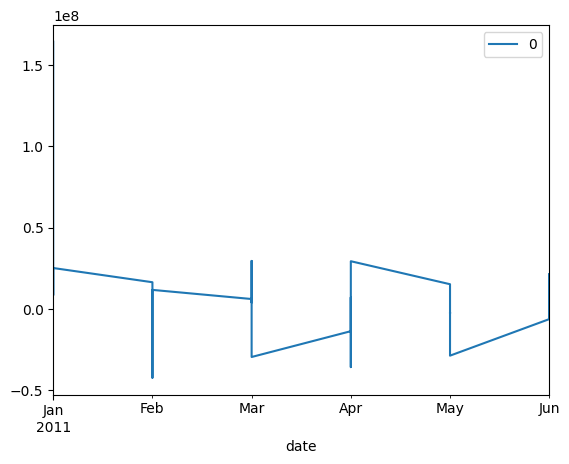

In [ ]:
residuals = pd.DataFrame(model_fit_arima.resid)
residuals.plot()
pyplot.show()

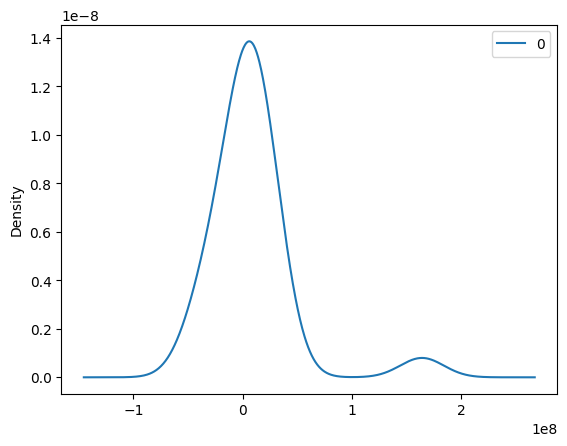

In [ ]:
residuals.plot(kind = 'kde')
pyplot.show()

In [ ]:
print(residuals.describe())

                  0
count  2.500000e+01
mean   7.822646e+06
std    3.799063e+07
min   -4.226050e+07
25%   -5.964853e+06
50%    6.099614e+06
75%    1.641074e+07
max    1.641992e+08


In [ ]:
X = series.values

size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len (X)]

ind_train, ind_test = mean_data.index[0:size], mean_data.index[size:len(X)]

In [ ]:
history = list(train)
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order = (8, 2, 2))
    model_fit = model.fit()

    y_hat = model_fit.forecast()[0]
    predictions.append(y_hat)

    y_real = test[t]
    history.append(y_real)

    print (f"{t+1} Predicho = {y_hat}, Esperado = {y_real}")

1 Predicho = 100304950.12191898, Esperado = 82620614.93333334
2 Predicho = 66464737.41852224, Esperado = 92843928.3
3 Predicho = 96892281.67206731, Esperado = 116443430.93333334
4 Predicho = 121304197.95120683, Esperado = 127469133.96666667
5 Predicho = 129595914.19494896, Esperado = 121391559.13333334


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE test: %.3f' % rmse)

RMSE test: 17298339.447


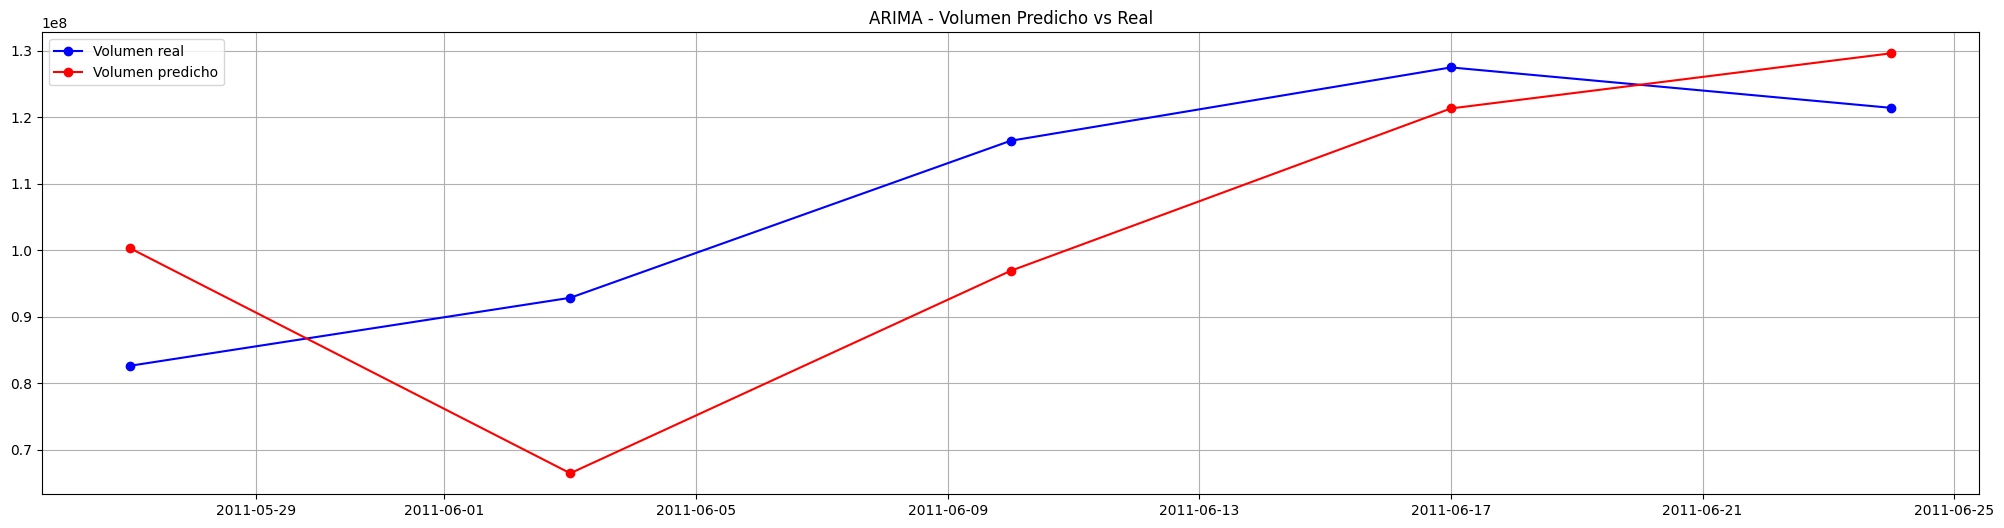

In [ ]:
fig = plt.figure(figsize= (25,6))

actual, = plt.plot(ind_test, test, 'bo-', label='Volumen real')
predicted, = plt.plot(ind_test, predictions, 'ro-', label='Volumen predicho')
plt.title('ARIMA - Volumen Predicho vs Real')
plt.legend(handles=[actual, predicted])
plt.grid()
plt.show()

## Compare los resultados con el modelo AR
**¿En que situaciones cree que seria mejor utilizar un modelo AR a un ARIMA?**
> Los resultados del modelo AR fueron mejores debido a que por la naturaleza de nuestros datos cuentan con estacionalidad, es decir, la media y la varianza son constantes a lo largo del tiempo. Por lo cual, no es necesario agregar la complejidad del ARIMA, ya que este último es más adecuado para aquellos conjuntos de datos que no tienen estacionalidad, debido a que incorpora la diferenciación para lograr la estacionalidad.